# **Heart Disease Prediction**

## **Exploratory Data Analysis (EDA)**
This notebook focuses on performing a detailed exploratory data analysis (EDA) to characterize the dataset and gain deeper insights into its structure and attributes. The goal is to identify potential data preparation steps, feature engineering needs, and the feasibility of implementing a heuristic model for the Heart Disease Project.

The insights gained from this analysis will be fundamental for data preprocessing and model development in the next steps of the project.

`Simón Correa Marín`


### **1. Import Libraries and Configurations**

In [38]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow as pa
import matplotlib.pyplot as plt

In [9]:
# configuration to show only 2 decimal places
pd.set_option("display.float_format", "{:.2f}".format)

In [10]:
# print library version for reproducibility

print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)

Python version:  3.12.9 (v3.12.9:fdb81425a9a, Feb  4 2025, 12:21:36) [Clang 13.0.0 (clang-1300.0.29.30)]
Pandas version:  2.2.3


### **2. Load Data**

In [11]:
DATA_DIR = Path.cwd().resolve().parents[0] / "data"

hd_df = pd.read_parquet(
    DATA_DIR / "02_intermediate/hd_type_fixed.parquet", engine="pyarrow"
)

### **3. Data Description**

In [12]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6848 entries, 0 to 6847
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rest_ecg    6392 non-null   category
 1   ca          6479 non-null   float64 
 2   thal        6552 non-null   category
 3   max_hr      6453 non-null   float64 
 4   exang       6848 non-null   bool    
 5   old_peak    6763 non-null   float64 
 6   chol        6643 non-null   float64 
 7   rest_bp     6655 non-null   float64 
 8   chest_pain  6648 non-null   category
 9   disease     6848 non-null   bool    
 10  sex         6692 non-null   category
 11  fbs         6848 non-null   bool    
 12  slope       6492 non-null   float64 
 13  age         6763 non-null   float64 
dtypes: bool(3), category(4), float64(7)
memory usage: 422.0 KB


In [23]:
# Convert columns to categorical again 
categorical_cols = ["chest_pain", "slope", "ca", "rest_ecg", "thal", "sex"]

# Categorical
hd_df[categorical_cols] = hd_df[categorical_cols].astype("category")

In [24]:
hd_df.shape

(6848, 14)

In [25]:
hd_df.sample(3)

,rest_ecg,ca,thal,max_hr,exang,old_peak,chol,rest_bp,chest_pain,disease,sex,fbs,slope,age
4717,normal,0.00,NaN,156.00,True,52.00,204.00,128.00,asymptomatic,True,Male,True,2.00,52.00
1101,left ventricular hypertrophy,3.00,normal,109.00,False,70.00,322.00,130.00,asymptomatic,True,Male,False,2.00,70.00
1607,left ventricular hypertrophy,3.00,reversable,131.00,True,58.00,216.00,128.00,asymptomatic,True,Male,False,2.00,58.00


In [26]:
# Number of missing values
hd_df.isnull().sum()

rest_ecg      456
ca            369
thal          296
max_hr        395
exang           0
old_peak       85
chol          205
rest_bp       193
chest_pain    200
disease         0
sex           156
fbs             0
slope         356
age            85
dtype: int64

**Target =** Disease

#### **Numerical Variables**

In [27]:
hd_df.describe()

,max_hr,old_peak,chol,rest_bp,age
count,6453.00,6763.00,6643.00,6655.00,6763.00
mean,149.81,54.43,246.34,131.70,54.43
std,22.71,9.00,50.07,17.55,9.00
min,71.00,29.00,126.00,94.00,29.00
25%,134.00,48.00,212.00,120.00,48.00
50%,153.00,56.00,241.00,130.00,56.00
75%,166.00,61.00,275.00,140.00,61.00
max,202.00,77.00,564.00,200.00,77.00


#### **Categorical Variables**

In [28]:
# categorical columns description
hd_df.describe(include="category")

,rest_ecg,ca,thal,chest_pain,sex,slope
count,6392,6479.00,6552,6648,6692,6492.00
unique,3,4.00,3,4,2,3.00
top,left ventricular hypertrophy,0.00,normal,asymptomatic,Male,1.00
freq,3172,3815.00,3640,3156,4546,3038.00


#### **Boolean Variables**

In [29]:
# boolean columns description
hd_df.describe(include="boolean")

,exang,disease,fbs
count,6848,6848,6848
unique,2,2,2
top,False,False,False
freq,4362,3570,5637


### **4. Univariate Analysis**

#### **Target Variable**

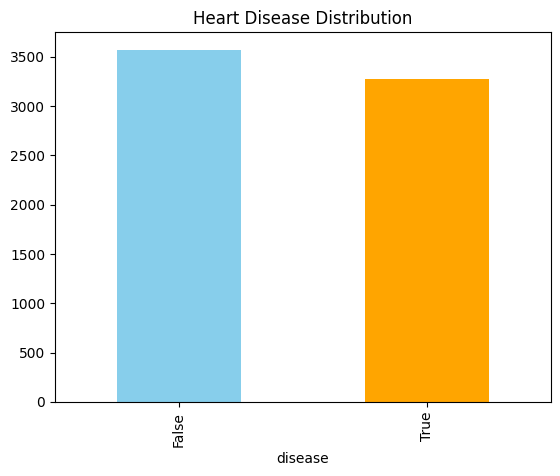

In [33]:
hd_df["disease"].value_counts().plot(
    kind="bar", color=["skyblue", "orange"], title="Heart Disease Distribution"
);

#### **Numerical Variables**

In [34]:
# list of the numerical columns
numerical_columns = list(hd_df.select_dtypes(include=["number"]).columns)
numerical_columns


['max_hr', 'old_peak', 'chol', 'rest_bp', 'age']

In [ ]:
def univariate_analysis_num(column, hist_bins):
    """
    Function to plot univariate analysis for numerical columns
    """
    print(hd_df[column].describe())  # Descriptive statistics
    print("\n")
    print(f"Unique values: {hd_df[column].nunique()} \n")  # Unique values
    print(f"Missing values: {hd_df[column].isnull().sum()}")  # Missing values

    # Histogram
    hd_df[column].plot(kind="hist", bins=hist_bins, edgecolor="black", title=f"{column} histogram")
    plt.show()

    # Density plot
    hd_df[column].plot(kind="density", title=f"{column} distribution")
    plt.show()

    # Boxplot
    hd_df[column].plot(kind="box", title=f"{column} boxplot")
    plt.show()
    
    return None


**max_hr**

count   6453.00
mean     149.81
std       22.71
min       71.00
25%      134.00
50%      153.00
75%      166.00
max      202.00
Name: max_hr, dtype: float64


Unique values: 91 

Missing values: 395


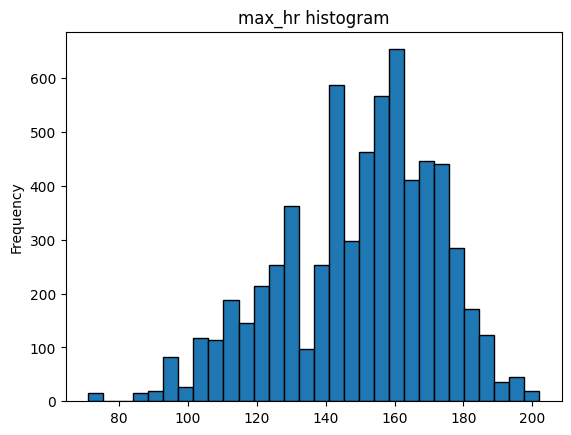

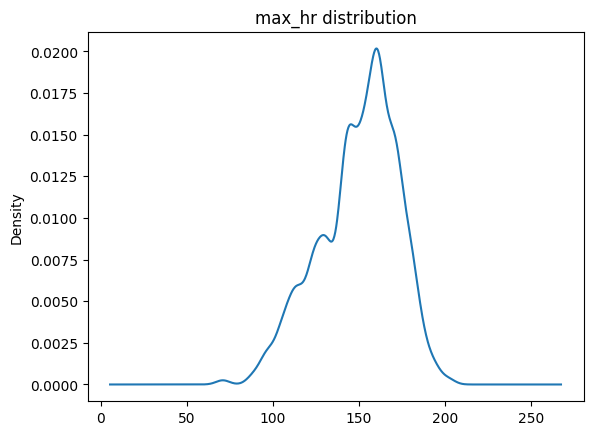

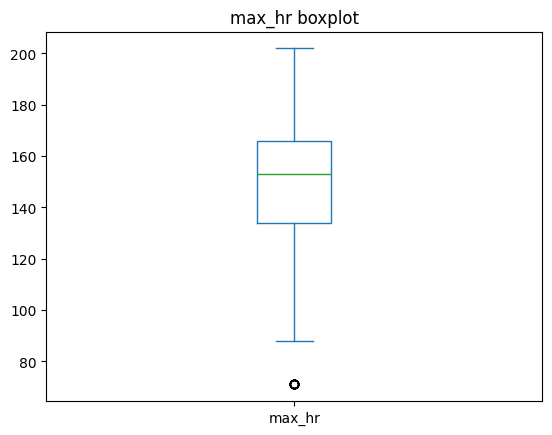

In [ ]:
univariate_analysis_num("max_hr", 30)

**old_peak**

count   6763.00
mean      54.43
std        9.00
min       29.00
25%       48.00
50%       56.00
75%       61.00
max       77.00
Name: old_peak, dtype: float64


Unique values: 41 

Missing values: 85


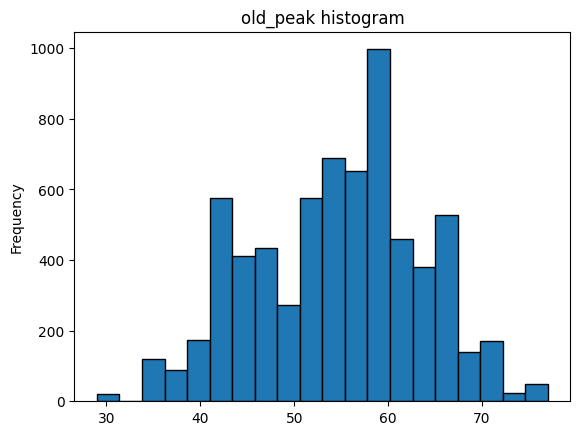

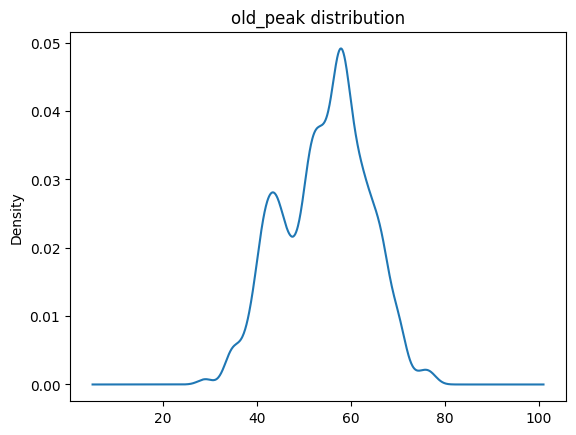

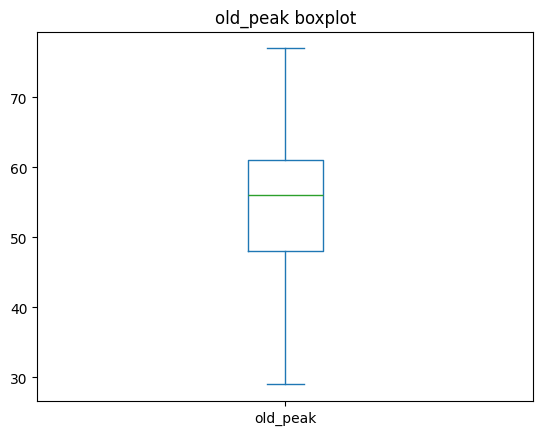

In [ ]:
univariate_analysis_num("old_peak", 20)

**chol**

count   6643.00
mean     246.34
std       50.07
min      126.00
25%      212.00
50%      241.00
75%      275.00
max      564.00
Name: chol, dtype: float64


Unique values: 152 

Missing values: 205


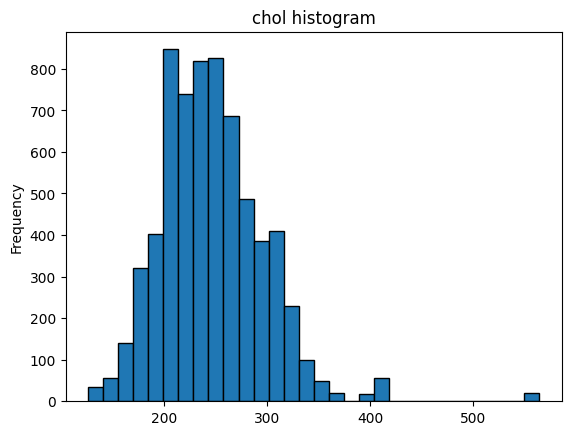

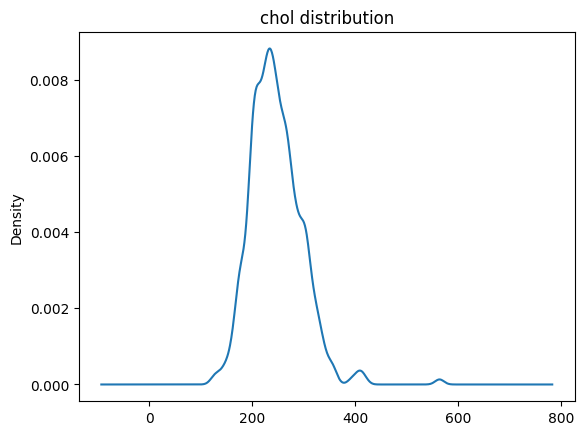

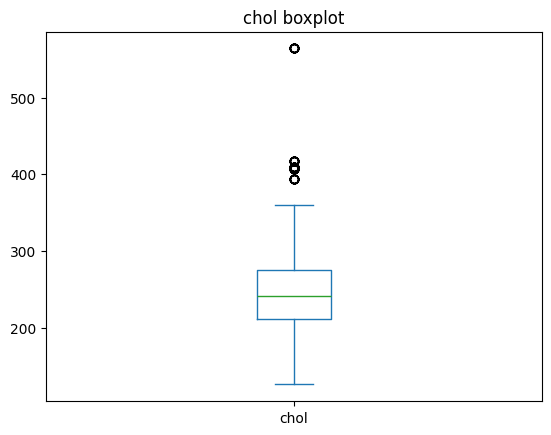

In [ ]:
univariate_analysis_num("chol", 30)

**rest_bp**

count   6655.00
mean     131.70
std       17.55
min       94.00
25%      120.00
50%      130.00
75%      140.00
max      200.00
Name: rest_bp, dtype: float64


Unique values: 50 

Missing values: 193


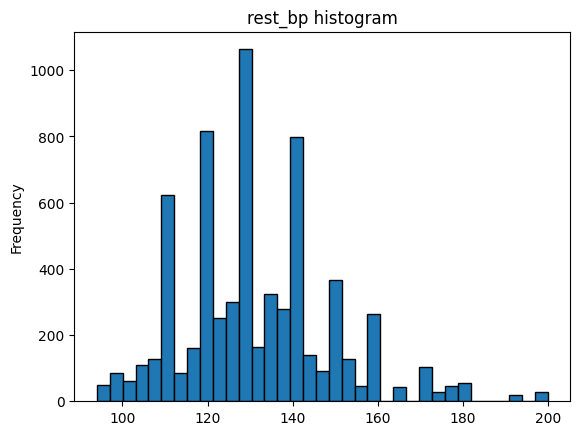

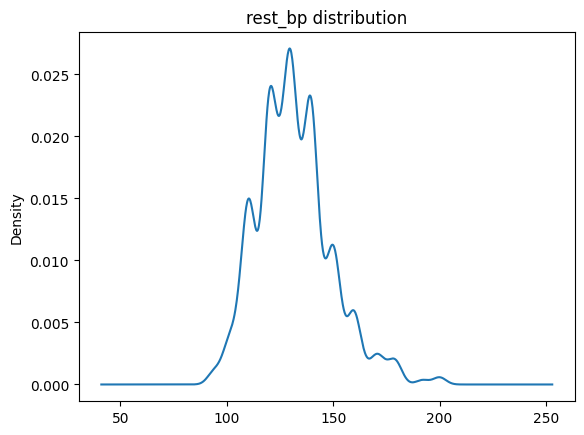

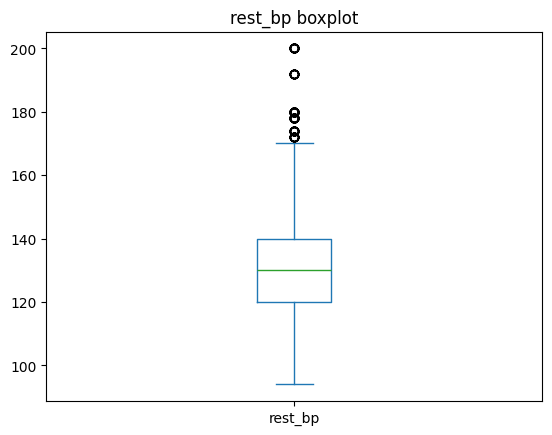

In [ ]:
univariate_analysis_num("rest_bp", 35)

**age**

count   6763.00
mean      54.43
std        9.00
min       29.00
25%       48.00
50%       56.00
75%       61.00
max       77.00
Name: age, dtype: float64


Unique values: 41 

Missing values: 85


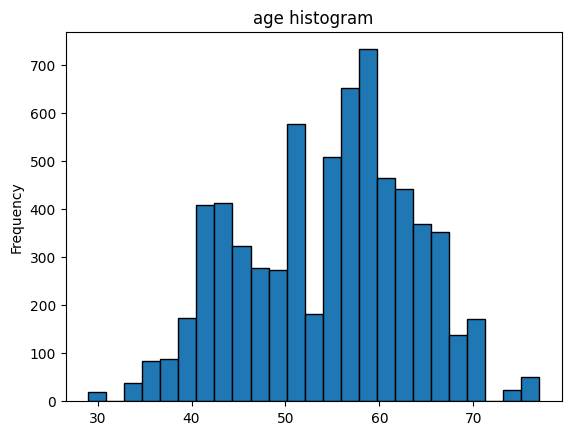

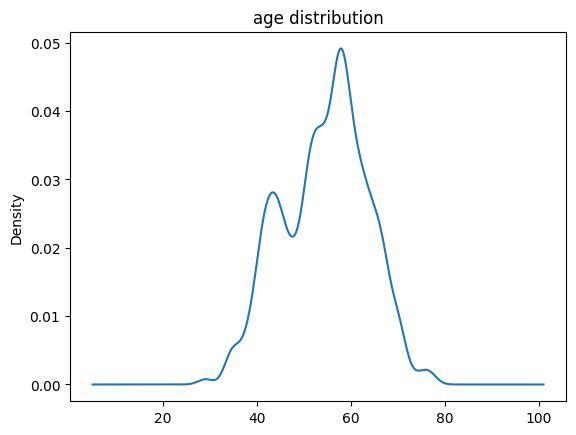

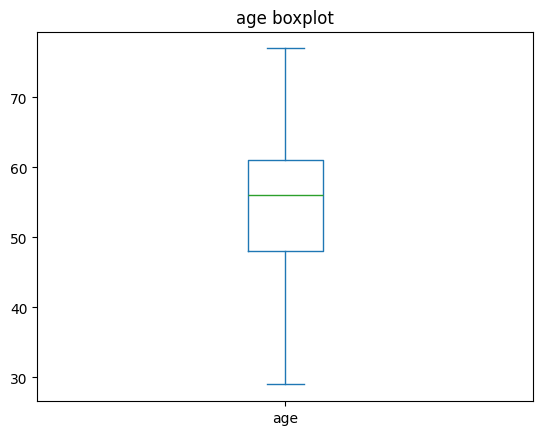

In [ ]:
univariate_analysis_num("age", 25)

#### **Categorical and Boolean Variables**

In [62]:
# list of the categorical columns
categorical_columns = list(hd_df.select_dtypes(include=["category", "boolean"]).columns)
categorical_columns


['rest_ecg',
 'ca',
 'thal',
 'exang',
 'chest_pain',
 'disease',
 'sex',
 'fbs',
 'slope']

In [71]:
def univariate_analysis_cat(column):
    """
    Function to plot univariate analysis for numerical columns
    """
    print(hd_df[column].describe())  # Descriptive statistics
    print("\n")

    print(f"Unique values: {hd_df[column].nunique()}")  # Unique values
    print(f"Missing values: {hd_df[column].isnull().sum()}\n")  # Missing values

    print(hd_df[column].value_counts())  # Frequency table
    print("\n")

    # Bar plot
    hd_df[column].value_counts().plot(
    kind="bar", color=["skyblue", "orange", "green"], title=f"{column} value counts");
    plt.show()

    return None


**rest_ecg**

count                              6392
unique                                3
top       left ventricular hypertrophy 
freq                               3172
Name: rest_ecg, dtype: object


Unique values: 3

Missing values: 456

rest_ecg
left ventricular hypertrophy     3172
normal                           3143
ST-T wave abnormality              77
Name: count, dtype: int64




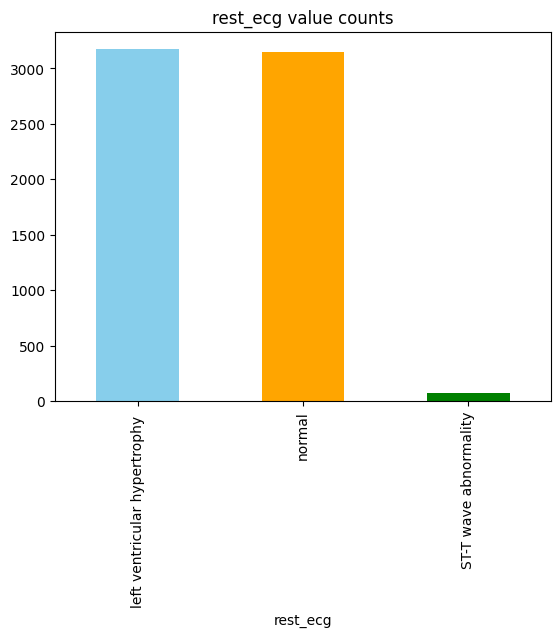

In [64]:
univariate_analysis_cat("rest_ecg")

**ca**

count    6479.00
unique      4.00
top         0.00
freq     3815.00
Name: ca, dtype: float64


Unique values: 4

Missing values: 369

ca
0.00    3815
1.00    1436
2.00     789
3.00     439
Name: count, dtype: int64




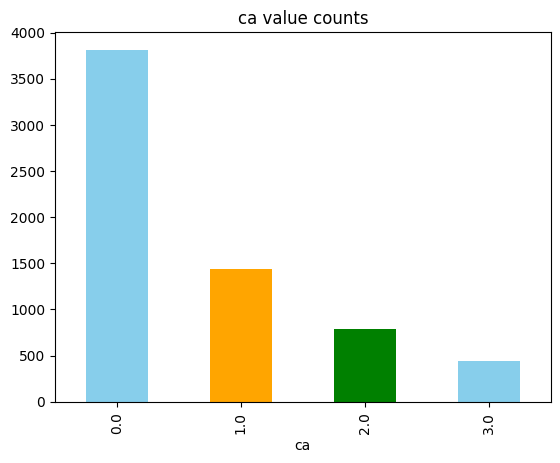

In [65]:
univariate_analysis_cat("ca")

**thal**

count       6552
unique         3
top       normal
freq        3640
Name: thal, dtype: object


Unique values: 3

Missing values: 296

thal
normal        3640
reversable    2507
fixed          405
Name: count, dtype: int64




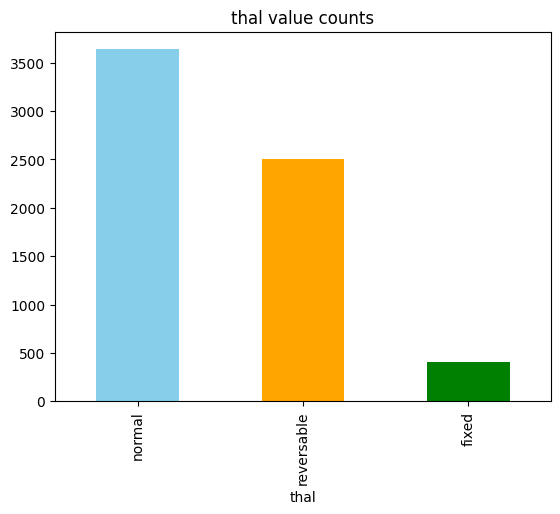

In [66]:
univariate_analysis_cat("thal")

**exang**

count      6848
unique        2
top       False
freq       4362
Name: exang, dtype: object


Unique values: 2

Missing values: 0

exang
False    4362
True     2486
Name: count, dtype: int64




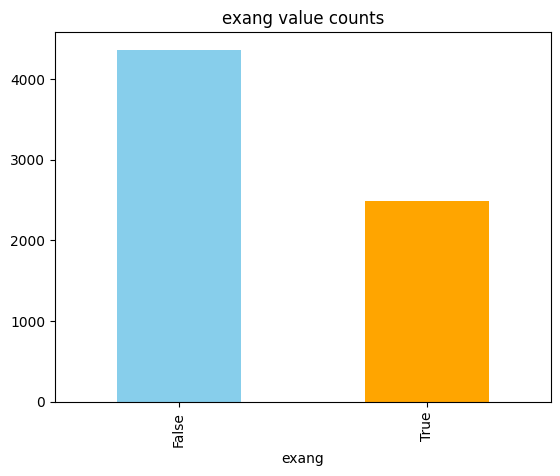

In [67]:
univariate_analysis_cat("exang")

**chest_pain**

count             6648
unique               4
top       asymptomatic
freq              3156
Name: chest_pain, dtype: object


Unique values: 4

Missing values: 200

chest_pain
asymptomatic    3156
nonanginal      1917
nontypical      1064
typical          511
Name: count, dtype: int64




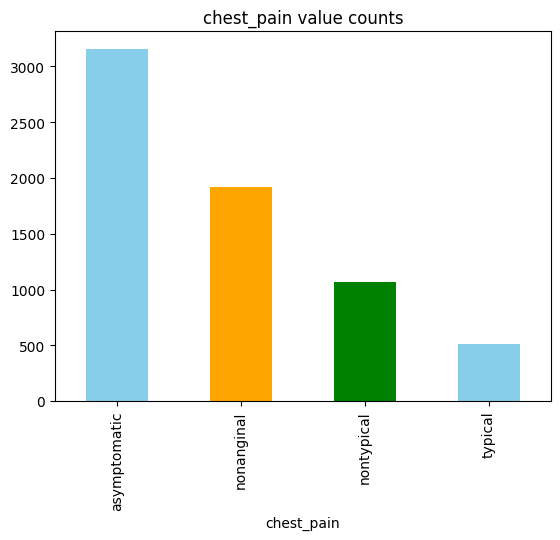

In [68]:
univariate_analysis_cat("chest_pain")

**sex**

count     6692
unique       2
top       Male
freq      4546
Name: sex, dtype: object


Unique values: 2

Missing values: 156

sex
Male      4546
Female    2146
Name: count, dtype: int64




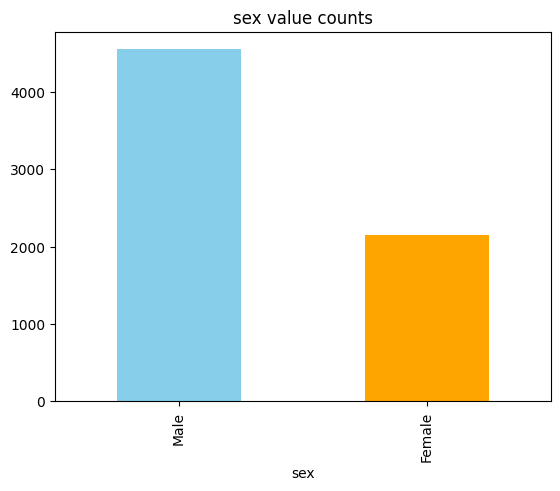

In [69]:
univariate_analysis_cat("sex")

**fbs**

count      6848
unique        2
top       False
freq       5637
Name: fbs, dtype: object


Unique values: 2

Missing values: 0

fbs
False    5637
True     1211
Name: count, dtype: int64




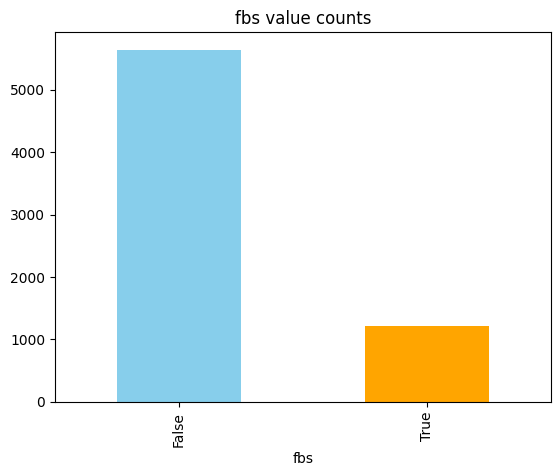

In [70]:
univariate_analysis_cat("fbs")

**slope**

count    6492.00
unique      3.00
top         1.00
freq     3038.00
Name: slope, dtype: float64


Unique values: 3
Missing values: 356

slope
1.00    3038
2.00    2972
3.00     482
Name: count, dtype: int64




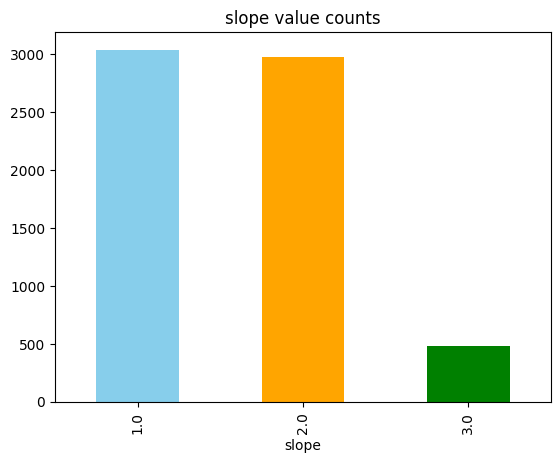

In [72]:
univariate_analysis_cat("slope")

**disease**

count      6848
unique        2
top       False
freq       3570
Name: disease, dtype: object


Unique values: 2
Missing values: 0

disease
False    3570
True     3278
Name: count, dtype: int64




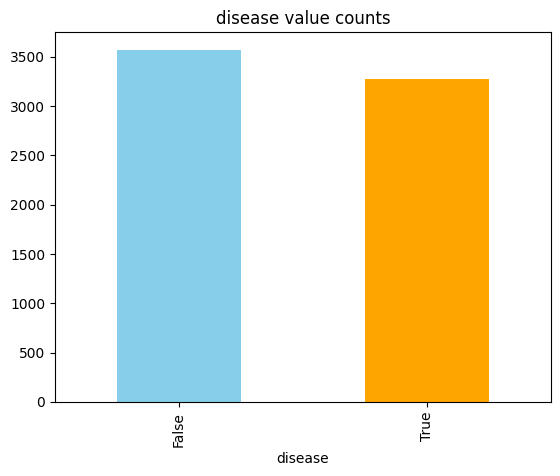

In [73]:
univariate_analysis_cat("disease")

### **5. Bivariate Analysis**